In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [160]:
df = pd.read_csv('T_games_dataset.csv')

# **Предварительный анализ данных**

In [161]:
df.head()

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88699 entries, 0 to 88698
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      88699 non-null  int64  
 1   client_id               88699 non-null  object 
 2   order_day               88699 non-null  object 
 3   category_id             88699 non-null  int64  
 4   category_name           88699 non-null  object 
 5   good_id                 88699 non-null  int64  
 6   good_name               88699 non-null  object 
 7   good_price              88699 non-null  float64
 8   good_cnt                88699 non-null  float64
 9   gender_cd               88699 non-null  object 
 10  age                     88699 non-null  int64  
 11  education_level         88699 non-null  object 
 12  city_nm                 88699 non-null  object 
 13  monthly_income_amt      88699 non-null  int64  
 14  steam_popularity_score  88699 non-null

In [163]:
df.describe()

,id,category_id,good_id,good_price,good_cnt,age,monthly_income_amt,steam_popularity_score
count,8.869900e+04,88699.000000,8.869900e+04,88699.000000,88699.0,88699.000000,8.869900e+04,88699.000000
mean,1.500462e+09,28968.248932,1.135675e+06,584.402189,1.0,26.600187,9.026706e+04,475.555395
std,1.448781e+05,1061.080699,2.831782e+05,877.856786,0.0,8.312742,1.422906e+05,1008.816453
min,1.500208e+09,28555.000000,8.472910e+05,2.320000,1.0,1.000000,-5.246740e+05,0.000000
25%,1.500337e+09,28562.000000,8.488950e+05,119.200000,1.0,20.000000,2.600000e+04,0.000000
50%,1.500457e+09,28574.000000,1.123866e+06,329.000000,1.0,26.000000,6.800000e+04,0.000000
75%,1.500578e+09,28577.000000,1.395053e+06,679.000000,1.0,32.000000,1.381100e+05,282.000000
max,1.500750e+09,35255.000000,1.774802e+06,10656.300000,1.0,86.000000,7.190000e+06,4981.000000


In [164]:
# Обработка выбросов в в поле age
down_p = np.percentile(df.age, 5)
up_p = np.percentile(df.age, 95)
print(down_p, up_p)

df = df[(df.age >= down_p) & (df.age <= up_p)]

15.0 41.0


In [165]:
# Обработка дубликатов (случаи, когда один и тот же клиент покупает один и тот же товар несколько раз)
df = df.drop_duplicates(subset=["client_id", "good_name"], keep="first").reset_index(drop=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76145 entries, 0 to 76144
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      76145 non-null  int64  
 1   client_id               76145 non-null  object 
 2   order_day               76145 non-null  object 
 3   category_id             76145 non-null  int64  
 4   category_name           76145 non-null  object 
 5   good_id                 76145 non-null  int64  
 6   good_name               76145 non-null  object 
 7   good_price              76145 non-null  float64
 8   good_cnt                76145 non-null  float64
 9   gender_cd               76145 non-null  object 
 10  age                     76145 non-null  int64  
 11  education_level         76145 non-null  object 
 12  city_nm                 76145 non-null  object 
 13  monthly_income_amt      76145 non-null  int64  
 14  steam_popularity_score  76145 non-null

In [167]:
# Преобразуем дату заказа в числовой формат (timestamp)
df["order_timestamp"] = pd.to_datetime(df['order_day']).apply(datetime.timestamp)

# Кодируем уровень образования в числовой формат
df["education_level_stamp"] = df["education_level"].apply(lambda level: level if isinstance(level, int) else [
    "SCH",
    "UGR",
    "GRD",
    "PGR",
    "ACD",
].index(level))

# Кодируем пол в числовой формат: M = 0, F = 1
df["gender_stamp"] = df["gender_cd"].apply(lambda x: x if isinstance(x, int) else [
    "M",
    "F"
].index(x))
df.head()

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score,order_timestamp,education_level_stamp,gender_stamp
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0,1.684703e+09,1,0
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0,1.684703e+09,2,0
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0,1.684876e+09,2,0
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0,1.666472e+09,2,0
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0,1.656796e+09,2,0


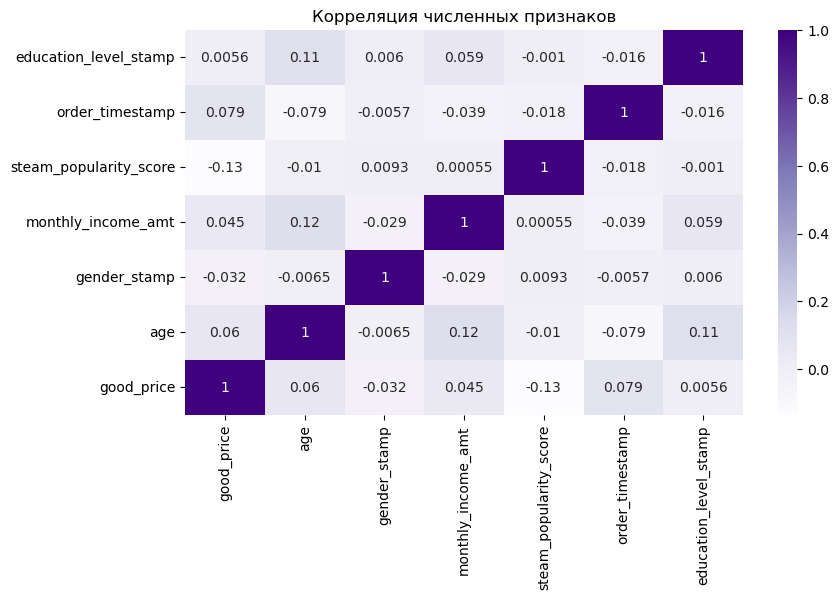

In [168]:
# Построим корреляционную матрицу по числовым признакам
fig = plt.figure(figsize=(9, 5))

correlation_matrix = df[["good_price", "age", "gender_stamp", "monthly_income_amt", "steam_popularity_score", "order_timestamp", "education_level_stamp"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Purples)

plt.gca().invert_yaxis()
plt.title('Корреляция численных признаков')
plt.show()

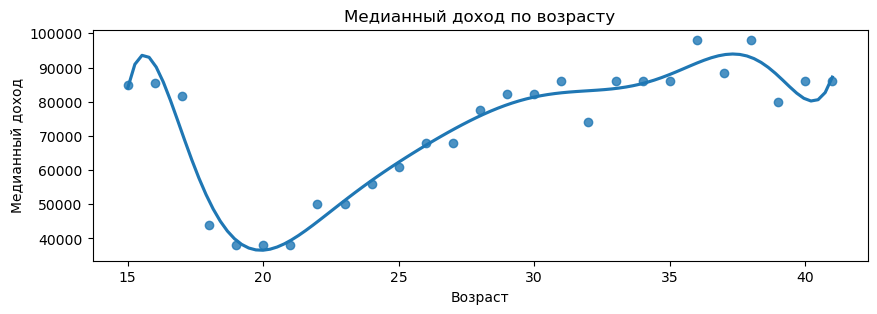

In [169]:
# Исследуем зависимость медианного дохода от возраста
# Группируем данные по возрасту и считаем медианный доход

plt.figure(figsize=(10, 3))

df1 = df[['age', 'monthly_income_amt']]
df2 = df1.groupby('age')['monthly_income_amt'].median().reset_index()
sns.regplot(x='age', y='monthly_income_amt', data=df2, order=9, ci=None)

plt.xlabel('Возраст')
plt.ylabel('Медианный доход')
plt.title('Медианный доход по возрасту')
plt.show()

# **Задача 1**

In [170]:
df_task1 = df.copy()

In [171]:
df_task1

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score,order_timestamp,education_level_stamp,gender_stamp
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0,1.684703e+09,1,0
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0,1.684703e+09,2,0
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0,1.684876e+09,2,0
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0,1.666472e+09,2,0
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0,1.656796e+09,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76140,1500562469,5-3FSSUW4LD,2023-05-12,28579,Гонки,880568,Cyberline Racing,5.80,1.0,M,15,GRD,Новосибирск,-85182,2444.0,1.683839e+09,2,0
76141,1500300796,5-355R05SQ3,2022-07-23,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,18,SCH,Москва,170486,0.0,1.658524e+09,0,0
76142,1500351510,5-8EVSLK13,2022-10-05,28577,Экшн,1406123,Dome Keeper - Deluxe Edition,561.60,1.0,M,33,SCH,Краснодар,230000,0.0,1.664917e+09,0,0
76143,1500476540,5-122LQCE7M,2023-02-13,28574,Ролевые (RPG),848895,Gothic Universe Edition,59.80,1.0,M,37,GRD,Москва,170000,0.0,1.676236e+09,2,0


In [172]:
# Добавляем колонку с количеством заказов на каждого клиента

df_task1['order_count'] = df_task1.groupby('client_id')['id'].transform('count')
df_task1

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score,order_timestamp,education_level_stamp,gender_stamp,order_count
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0,1.684703e+09,1,0,9
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0,1.684703e+09,2,0,9
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0,1.684876e+09,2,0,48
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0,1.666472e+09,2,0,1
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0,1.656796e+09,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76140,1500562469,5-3FSSUW4LD,2023-05-12,28579,Гонки,880568,Cyberline Racing,5.80,1.0,M,15,GRD,Новосибирск,-85182,2444.0,1.683839e+09,2,0,1
76141,1500300796,5-355R05SQ3,2022-07-23,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,18,SCH,Москва,170486,0.0,1.658524e+09,0,0,1
76142,1500351510,5-8EVSLK13,2022-10-05,28577,Экшн,1406123,Dome Keeper - Deluxe Edition,561.60,1.0,M,33,SCH,Краснодар,230000,0.0,1.664917e+09,0,0,50
76143,1500476540,5-122LQCE7M,2023-02-13,28574,Ролевые (RPG),848895,Gothic Universe Edition,59.80,1.0,M,37,GRD,Москва,170000,0.0,1.676236e+09,2,0,19


In [173]:
# Рассчитываем границы активности игроков по перцентилям

lvl_5 = np.percentile(df_task1.order_count, 5)
lvl_95 = np.percentile(df_task1.order_count, 95)

df_task1['activity_level'] = pd.cut(df_task1['order_count'], bins = [0, lvl_5, lvl_95, df_task1['order_count'].max()],
                                 labels=['Случайный игрок', 'Активный игрок', 'Заядлый игрок'])

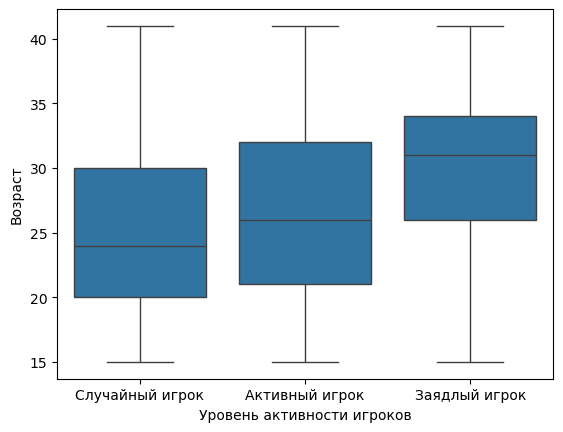

In [174]:
# Визуализируем возраст игроков по уровням активности

sns.boxplot(data=df_task1, x='activity_level', y='age')

plt.xlabel('Уровень активности игроков')
plt.ylabel('Возраст')
plt.show()

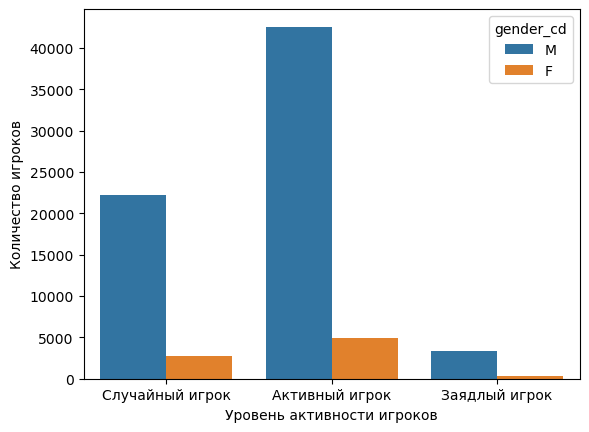

In [175]:
# Сравниваем распределение пола по уровням активности игроков

sns.countplot(data=df_task1, x='activity_level', hue='gender_cd')

plt.xlabel('Уровень активности игроков')
plt.ylabel('Количество игроков')
plt.show()

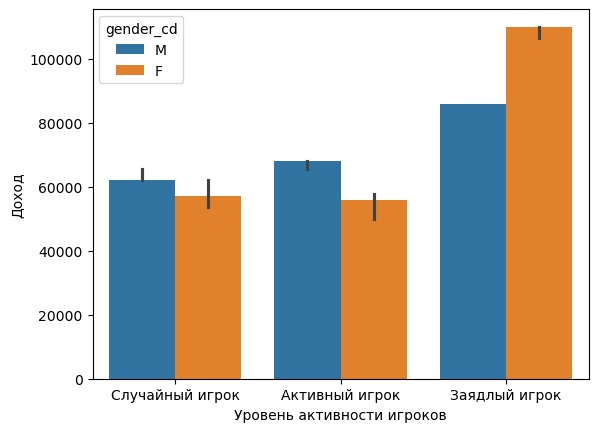

In [176]:
# Анализ медианного дохода игроков по уровням активности и полу

sns.barplot(data=df_task1, x='activity_level', y='monthly_income_amt',  hue='gender_cd', estimator=np.median)

plt.xlabel('Уровень активности игроков')
plt.ylabel('Доход')
plt.show()

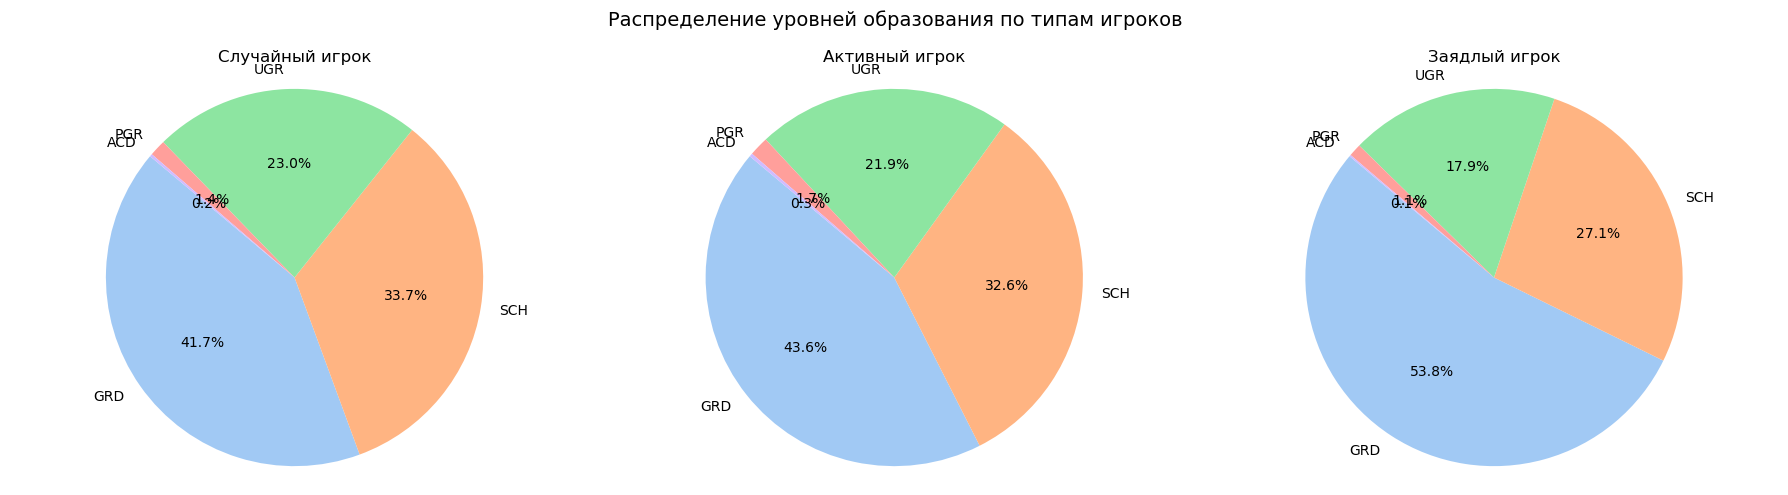

In [177]:
# Распределение уровней образования среди игроков разных уровней активности

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Один ряд, три пайчарта

counts1 = df_task1[df_task1['activity_level'] == 'Случайный игрок']['education_level'].value_counts()
counts2 = df_task1[df_task1['activity_level'] == 'Активный игрок']['education_level'].value_counts()
counts3 = df_task1[df_task1['activity_level'] == 'Заядлый игрок']['education_level'].value_counts()

colors = sns.color_palette('pastel')

axes[0].pie(counts1, labels=counts1.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title('Случайный игрок')
axes[0].axis('equal')

axes[1].pie(counts2, labels=counts2.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title('Активный игрок')
axes[1].axis('equal')

axes[2].pie(counts3, labels=counts3.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[2].set_title('Заядлый игрок')
axes[2].axis('equal')

plt.suptitle('Распределение уровней образования по типам игроков', fontsize=14)
plt.tight_layout()
plt.show()

### **Портреты покупателей видеоигр**
- Портрет среднего покупателя видеоигр — это мужчина в возрасте около 27 лет, с высшим образованием и средним доходом порядка 70 000 ₽.

- При сегментации аудитории по уровню активности выявлено, что заядлые игроки в среднем старше остальных пользователей (примерно 30 лет), среди них доминируют мужчины. При этом интересно отметить, что женщины в этой группе демонстрируют более высокий средний доход, превышающий 110 000 ₽, что контрастирует с доходами мужчин того же сегмента.

In [178]:
# Строим сводную таблицу по категориям игр

df_heatmap = df_task1[['category_name','age', 'gender_cd', 'monthly_income_amt', 'education_level']]
df_heatmap = df_heatmap.groupby('category_name').agg(
    средний_возраст = ('age', 'mean'),
    процент_мужчин = ('gender_cd', lambda x: (x == 'M').mean() * 100),
    средний_доход = ('monthly_income_amt', 'median'),
    процент_вышек = ('education_level', lambda x: (x == 'GRD').mean() * 100)
)

df_heatmap

,средний_возраст,процент_мужчин,средний_доход,процент_вышек
category_name,,,,
Anime,24.807440,89.715536,56000.0,40.043764
VR,22.654229,88.059701,56000.0,37.562189
Xbox подписка,28.097436,88.205128,81071.0,46.666667
Аркады,25.782341,92.197125,62000.0,43.942505
Бестселлеры,25.017636,92.357673,62000.0,41.769802
Гонки,25.461290,93.145161,62000.0,42.258065
Для детей,28.863636,77.272727,74834.0,50.000000
Другое,28.098859,93.916350,86000.0,40.304183
Инди,25.635221,85.068139,62000.0,43.139098


In [179]:
# Стандартизируем данные для выбранных признаков
features = ['средний_возраст', 'процент_мужчин', 'средний_доход', 'процент_вышек']

scaled_data = StandardScaler().fit_transform(df_heatmap[features])
scaled_df = pd.DataFrame(scaled_data, index=df_heatmap.index, columns=features)

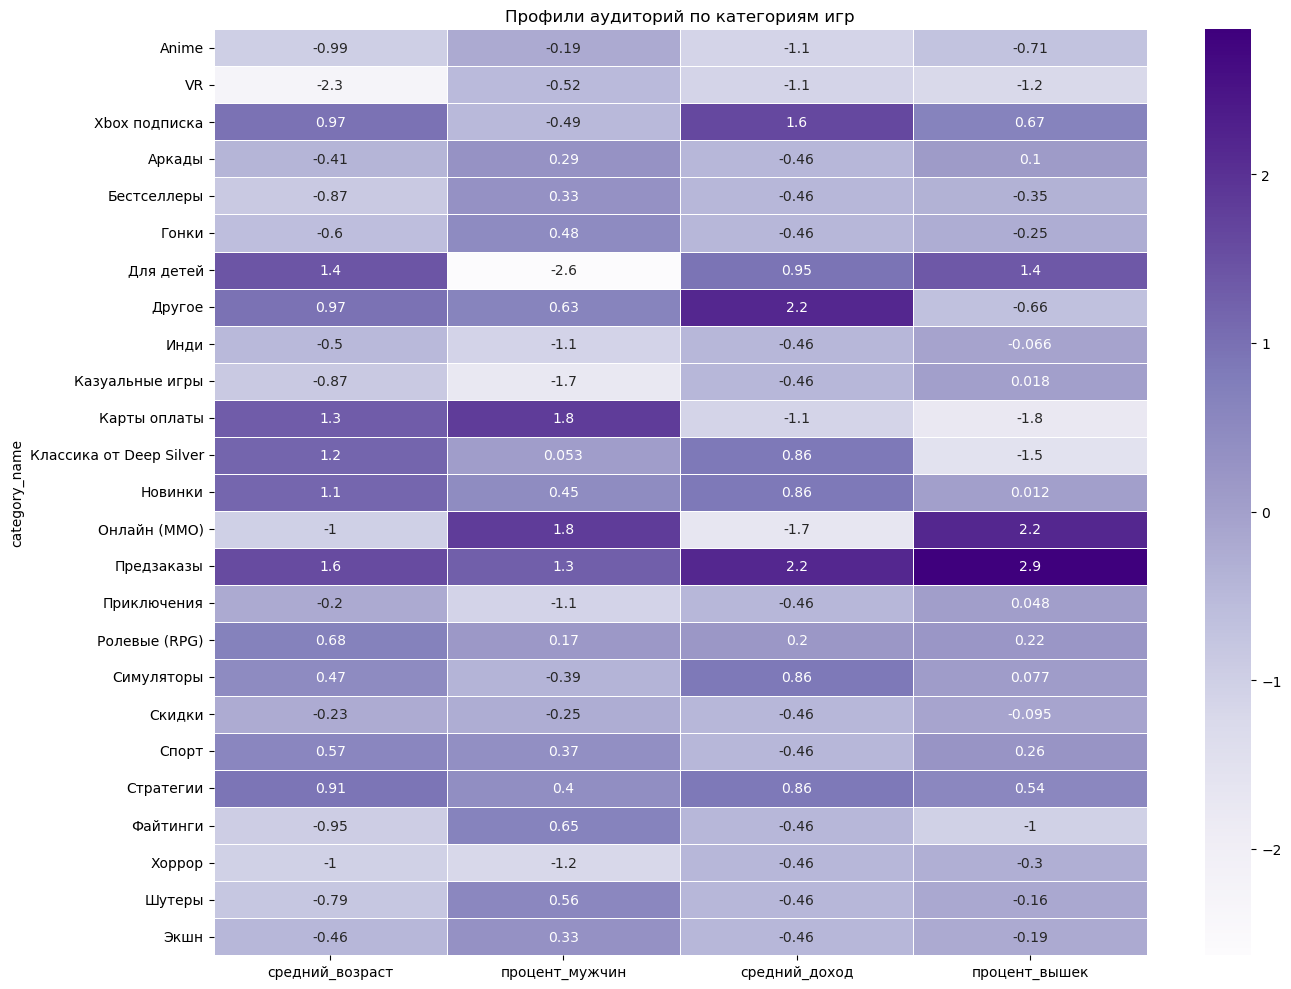

In [180]:
# Строим тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(scaled_df, annot=True, cmap=plt.cm.Purples, linewidths=.5)
plt.title("Профили аудиторий по категориям игр")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Кластеризация покупателей видеоигр**

- Категории “Anime” и “VR” ориентированы на ещё более молодую мужскую аудиторию (22–24 года) с относительно низким доходом — около 56 000 ₽. Это может быть студенческая или начальная профессиональная группа пользователей. (Юные нишевые игроки)

- Игры жанров “Аркады”, “Бестселлеры”, “Гонки”, “Файтинги”, “Хоррор”, “Шутеры” и “Экшн” преимущественно покупают мужчины около 25 лет со средним доходом порядка 62 000 ₽. Это — основная массовая аудитория игрового направления. (Молодые массовые геймеры)
  
- Игры из категорий “Xbox подписка”, “Для детей”, “Другое” и “Предзаказы” покупают преимущественно взрослые мужчины (28–29 лет) с более высоким доходом — в среднем около 80 000 ₽, что может свидетельствовать о более стабильной и платёжеспособной пользовательской базе.                    (Зрелая платёжеспособная аудитория)

In [181]:
# Преобразуем дату из столбца 'order_day' в формат периода (месяц), чтобы упростить анализ данных по месяцам.

df_task1['дата'] = pd.to_datetime(df_task1['order_day']).dt.to_period('M')

In [182]:
df_active = df_task1.groupby(['дата', 'activity_level']).agg(
    возраст = ('age', 'mean'),
    доход = ('monthly_income_amt', 'median'),
    образование = ('education_level', lambda x: x.value_counts().idxmax()),
    пол = ('gender_cd', lambda x: x.value_counts().idxmax())
).reset_index()
df_active['дата'] = df_active['дата'].dt.to_timestamp()

C:\Users\79509\AppData\Local\Temp\ipykernel_1884\3593524092.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_active = df_task1.groupby(['дата', 'activity_level']).agg(


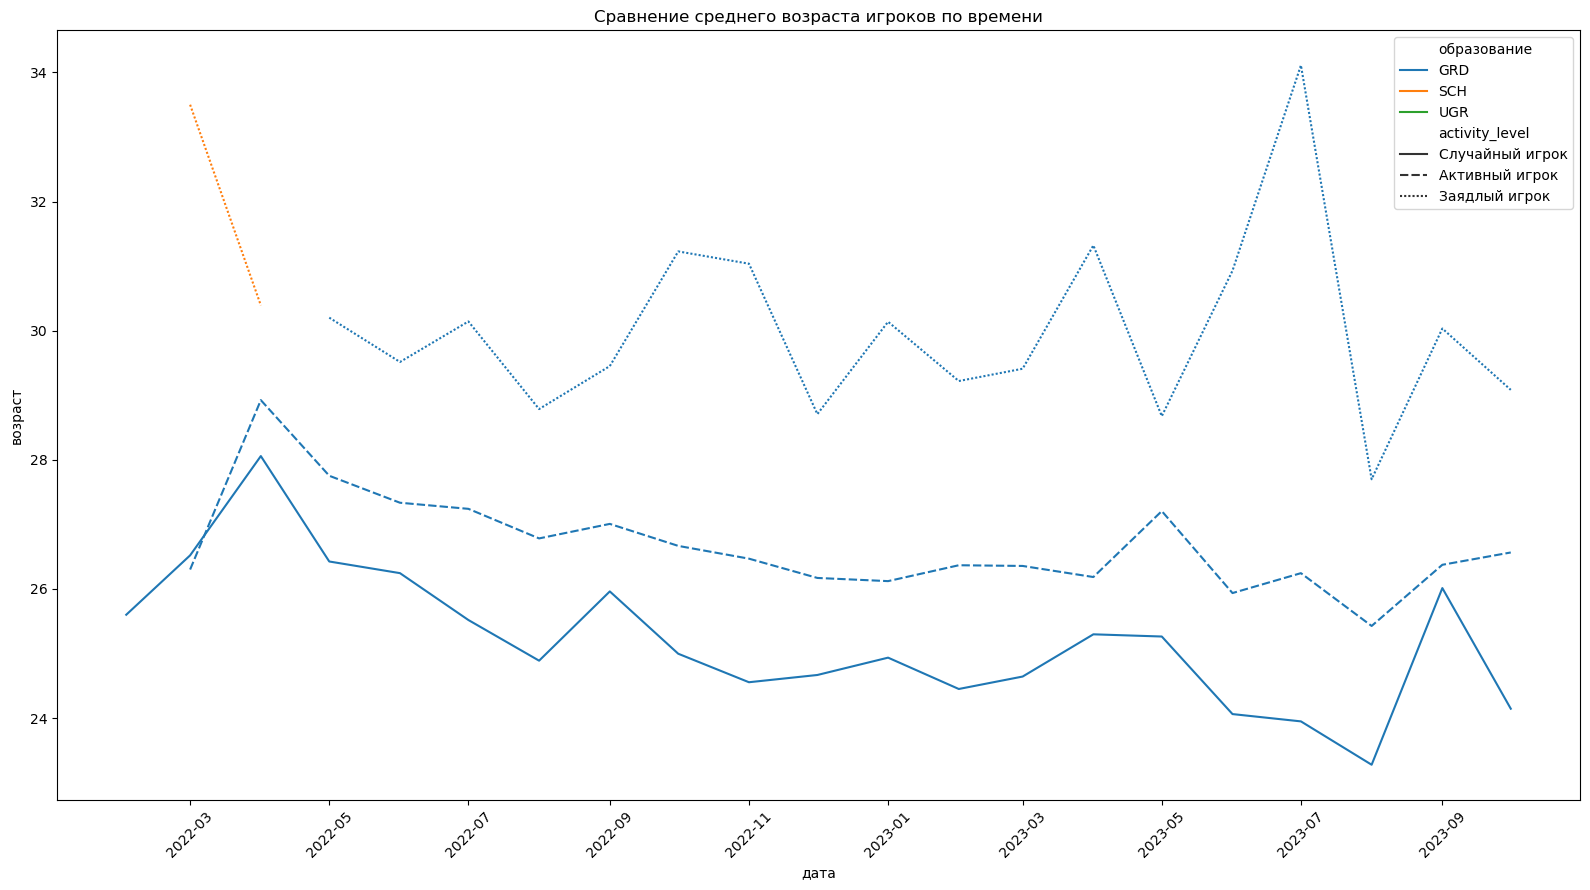

In [183]:
# Строим линейный график, который сравнивает средний возраст игроков по времени, различая группы по уровню образования и активности.

plt.figure(figsize=(16, 9))

sns.lineplot(data=df_active, x='дата', y='возраст', hue='образование', style='activity_level')
plt.xticks(rotation=45)
plt.title("Сравнение среднего возраста игроков по времени")
plt.tight_layout()
plt.show()

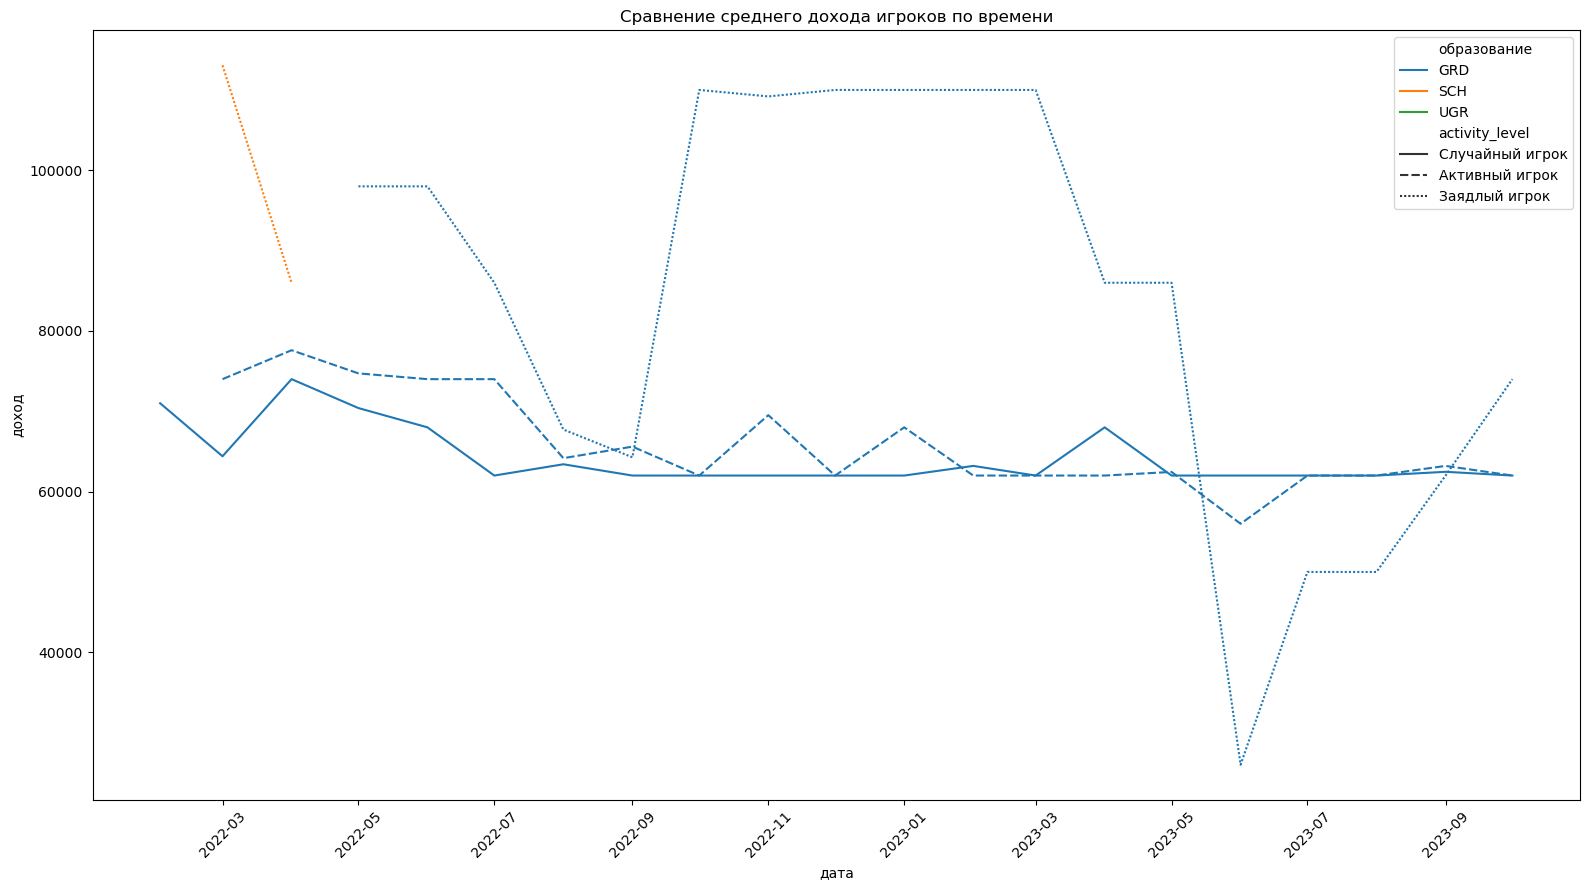

In [184]:
# Строим линейный график для сравнения медианного дохода игроков по времени, с разделением по уровню образования и активности.

plt.figure(figsize=(16, 9))

sns.lineplot(data=df_active, x='дата', y='доход', hue='образование', style='activity_level')
plt.xticks(rotation=45)
plt.title("Сравнение среднего дохода игроков по времени")
plt.tight_layout()
plt.show()

### **Справедливы ли выводы предыдущих пунктов на всем представленном временном промежутке?**

В течение всего анализируемого периода аудитория видеоигр оставалась преимущественно мужской, вне зависимости от уровня игровой активности.

Средний возраст активных игроков стабильно ниже, чем у заядлых — около 27 лет против 30 лет, что подтверждает гипотезу о том, что активная вовлечённость возрастает с возрастом.

Большинство игроков имеют высшее образование, причём этот тренд сохраняется на всём горизонте анализа. Однако в начале периода среди заядлых игроков наблюдалась небольшая доля пользователей с начальными или средними уровнями образования, преимущественно в возрастной группе 30–33 лет.

Что касается уровня дохода, то у активных игроков он оставался стабильным на всём временном промежутке и колебался в пределах около 70 000 ₽. В то же время у заядлых игроков наблюдались выраженные колебания: в частности, в сентябре 2022 года и июне 2023 года фиксировались аномальные спады. Несмотря на это, в течение периода с октября 2022 по апрель 2023 года доход заядлых игроков стабильно превышал 100 000 ₽, что позволяет говорить о более платёжеспособной части аудитории в этой группе.

In [185]:
# Создаём новую категорию — «группа игр» — сопоставляя каждую игровую категорию с заранее определённым кластером аудитории

genre_to_cluster = {
    'Anime': 'Юные нишевые игроки',
    'VR': 'Юные нишевые игроки',
    'Аркады': 'Молодые массовые геймеры',
    'Бестселлеры': 'Молодые массовые геймеры',
    'Гонки': 'Молодые массовые геймеры',
    'Файтинги': 'Молодые массовые геймеры',
    'Хоррор': 'Молодые массовые геймеры',
    'Шутеры': 'Молодые массовые геймеры',
    'Экшн': 'Молодые массовые геймеры',
    'Xbox подписка': 'Зрелая платёжеспособная аудитория',
    'Для детей': 'Зрелая платёжеспособная аудитория',
    'Другое': 'Зрелая платёжеспособная аудитория',
    'Предаватель': 'Зрелая платёжеспособная аудитория'
}

df_task1['группа_игр'] = df_task1['category_name'].map(genre_to_cluster)

In [186]:
# Группируем данные по дате и кластеру аудитории, вычисляя средний возраст, медианный доход, наиболее частый уровень образования и пол, 
# чтобы проанализировать характеристики различных групп игроков во времени

df_clusters = df_task1[df_task1['группа_игр'].notna()].groupby(['дата', 'группа_игр']).agg(
    возраст = ('age', 'mean'),
    доход = ('monthly_income_amt', 'median'),
    образование = ('education_level', lambda x: x.value_counts().idxmax()),
    пол = ('gender_cd', lambda x: x.value_counts().idxmax())
).reset_index()

df_clusters['дата'] = df_clusters['дата'].dt.to_timestamp()

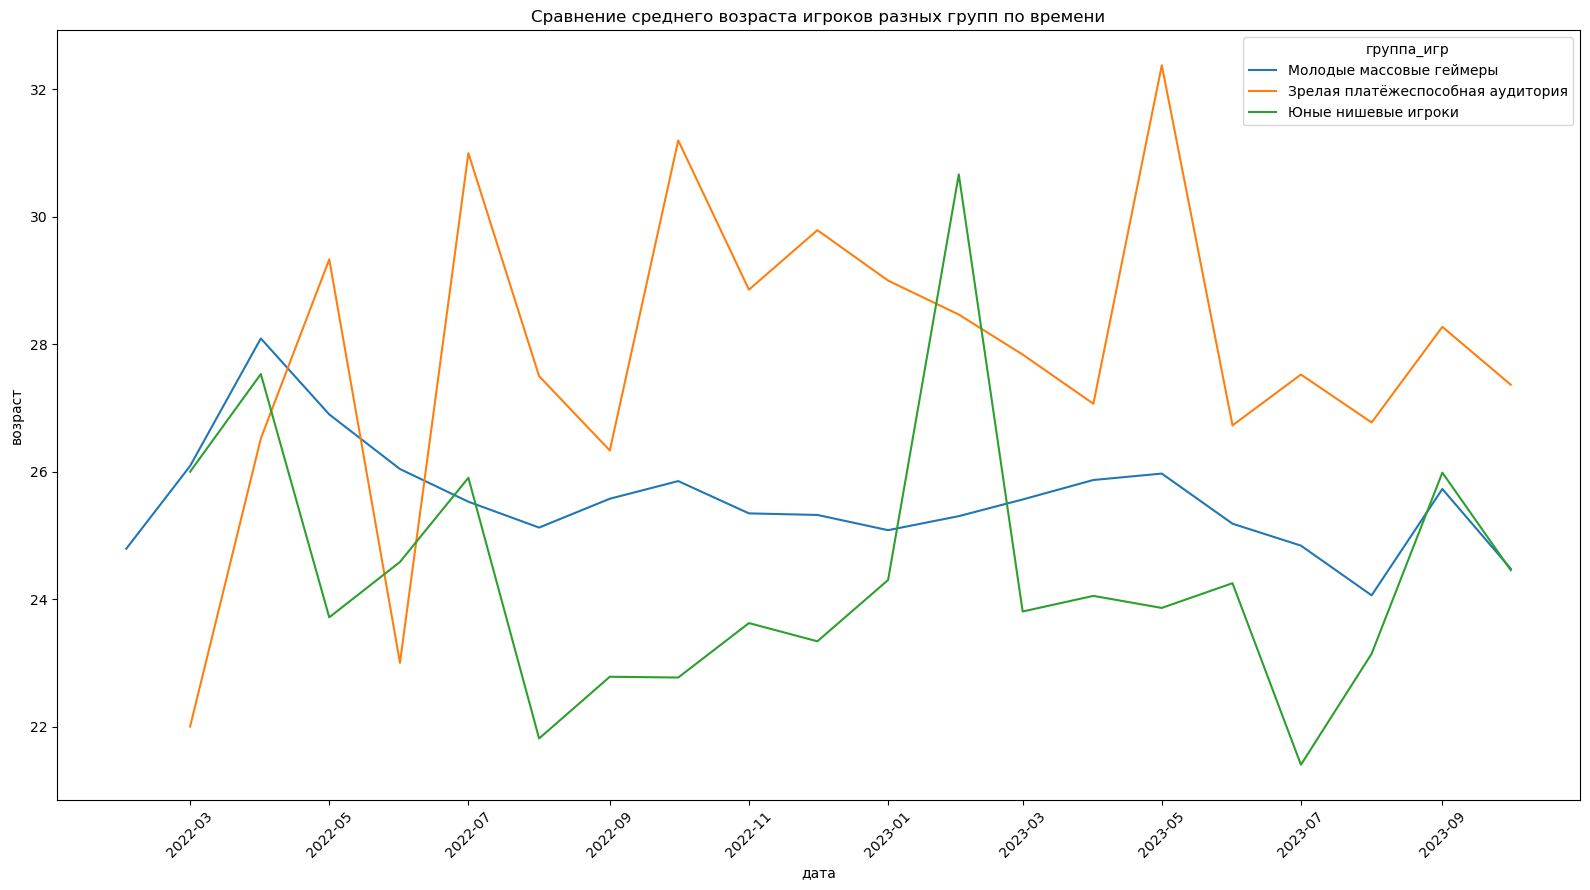

In [187]:
# Строим линейный график для сравнения среднего возраста игроков различных кластеров аудитории по времени.

plt.figure(figsize=(16, 9))

sns.lineplot(data=df_clusters, x='дата', y='возраст', hue='группа_игр')
plt.xticks(rotation=45)
plt.title("Сравнение среднего возраста игроков разных групп по времени")
plt.tight_layout()
plt.show()

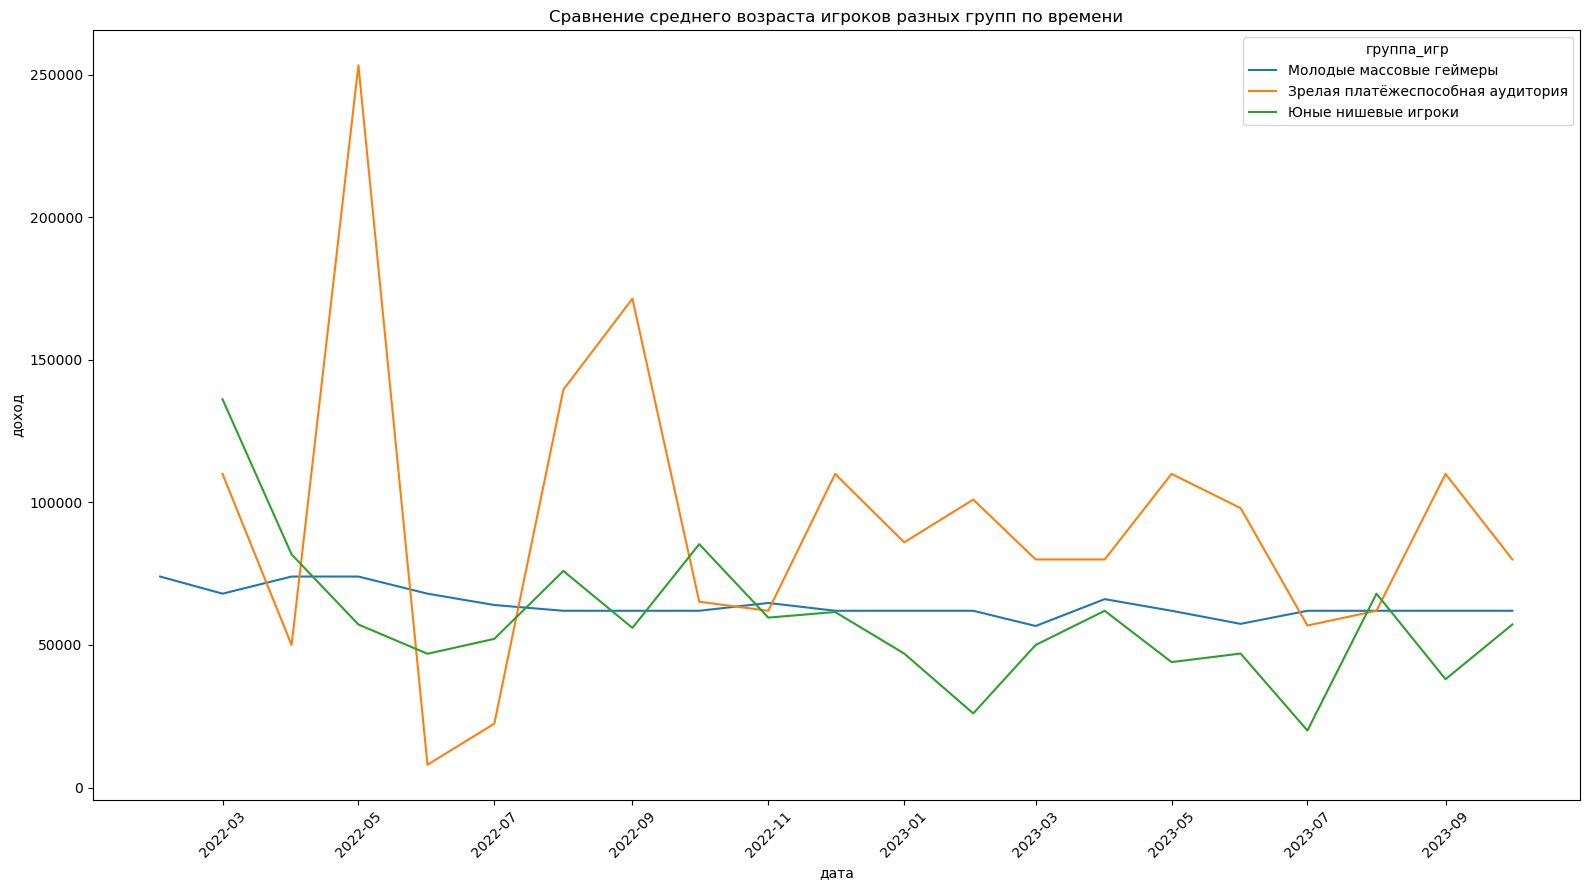

In [188]:
# Строим линейный график для сравнения медианного дохода игроков различных кластеров аудитории по времени.

plt.figure(figsize=(16, 9))

sns.lineplot(data=df_clusters, x='дата', y='доход', hue='группа_игр')
plt.xticks(rotation=45)
plt.title("Сравнение среднего возраста игроков разных групп по времени")
plt.tight_layout()
plt.show()

### **Справедливы ли выводы предыдущих пунктов на всем представленном временном промежутке?**

Аудитории жанров остаются устойчивыми по своим основным характеристикам на протяжении всего наблюдаемого периода.
Молодые массовые геймеры и юные нишевые игроки показывают стабильные метрики по возрасту и доходу.

Зрелая аудитория демонстрирует характерные признаки платёжеспособности, несмотря на выбросы по доходу в отдельных месяцах. Это говорит о том, что сегментация по жанрам действительно отражает различия в поведении и профиле пользователей, а выявленные группы имеют прикладную ценность для продуктового и маркетингового позиционирования.

# **Задача 2**

In [189]:
df_task2 = df.copy()

In [190]:
df_task2

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score,order_timestamp,education_level_stamp,gender_stamp
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0,1.684703e+09,1,0
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0,1.684703e+09,2,0
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0,1.684876e+09,2,0
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0,1.666472e+09,2,0
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0,1.656796e+09,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76140,1500562469,5-3FSSUW4LD,2023-05-12,28579,Гонки,880568,Cyberline Racing,5.80,1.0,M,15,GRD,Новосибирск,-85182,2444.0,1.683839e+09,2,0
76141,1500300796,5-355R05SQ3,2022-07-23,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,18,SCH,Москва,170486,0.0,1.658524e+09,0,0
76142,1500351510,5-8EVSLK13,2022-10-05,28577,Экшн,1406123,Dome Keeper - Deluxe Edition,561.60,1.0,M,33,SCH,Краснодар,230000,0.0,1.664917e+09,0,0
76143,1500476540,5-122LQCE7M,2023-02-13,28574,Ролевые (RPG),848895,Gothic Universe Edition,59.80,1.0,M,37,GRD,Москва,170000,0.0,1.676236e+09,2,0


In [191]:
# Приводим названия товаров к нижнему регистру и удаляем лишние пробелы, 
# затем агрегируем данные по цене и названию товара, рассчитывая общее количество продаж и уникальных заказов для анализа распределения продаж.

df_task2['good_name'] = df_task2['good_name'].str.lower().str.strip()

price_dist = df_task2.groupby(['good_price', 'good_name']).agg(
    кол_продаж = ('good_cnt', 'sum'),
    кол_заказов = ('id', 'nunique')
).reset_index()

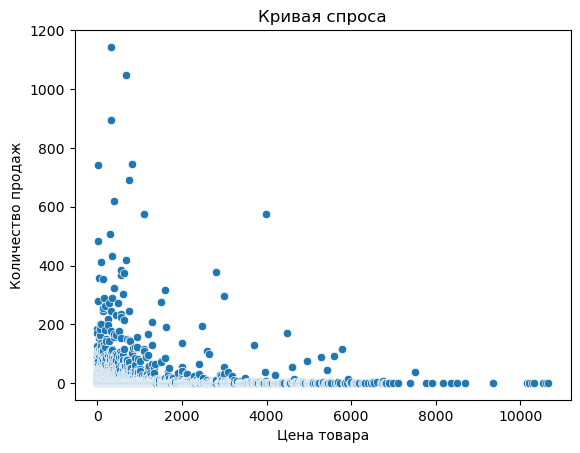

In [192]:
# Строим диаграмму рассеяния (scatter plot), чтобы визуализировать зависимость между ценой товара и количеством его продаж — кривая спроса.

sns.scatterplot(data=price_dist, x='good_price', y='кол_продаж')

plt.xlabel('Цена товара')
plt.ylabel('Количество продаж')
plt.title('Кривая спроса')
plt.show()

### **Выводы из графика 'Кривая спроса'**

- Эластичность существует и довольно высокая: до 1000–1500 ₽ — резкое падение количества продаж с увеличением цены. Это поведение соответствует высокой ценовой эластичности: небольшое снижение цены — даёт значительный рост спроса.

- Существует “оптимальная зона” по цене: cамые плотные точки — в районе 400–800 рублей.

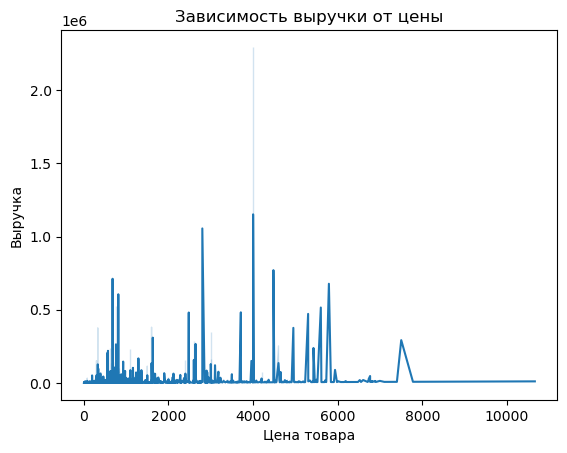

In [193]:
# Рассчитываем выручку по каждому товару и строим график зависимости выручки от цены, чтобы определить оптимальные ценовые точки.

price_dist['выручка'] = price_dist['good_price'] * price_dist['кол_продаж']

sns.lineplot(data=price_dist.sort_values('good_price'), x='good_price', y='выручка')

plt.xlabel('Цена товара')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от цены')
plt.show()

In [194]:
# Выводим топ-5 товаров с наибольшей выручкой для выявления самых прибыльных позиций.

price_dist.sort_values('выручка', ascending=False).head(5)

,good_price,good_name,кол_продаж,кол_заказов,выручка
7266,3999.00,elden ring,574.0,574,2295426.00
7033,2799.30,elden ring,377.0,377,1055336.10
7073,2999.00,apex legends: 4350 coins,296.0,296,887704.00
7318,4478.88,elden ring,172.0,172,770367.36
5520,679.00,resident evil 2 - deluxe edition,1048.0,1048,711592.00


### **Выводы из графика 'Зависимость выручки от цены'**

Основной объём продаж приходится на ценовой диапазон до 1500 ₽, что указывает на высокую эластичность спроса.

- Наибольшая выручка наблюдается в районе 3500–4000 ₽, однако эти пики связаны, как правило, с отдельными хитами (Elden Ring).

- Цены выше 6000 ₽ почти не формируют продаж — они подходят только для узконишевых продуктов.

- Цены ниже 500 ₽, несмотря на объём продаж, редко окупаются с точки зрения выручки.

### **Вывод**

- Цены в диапазоне 1000–2500 ₽ обеспечивают оптимальный баланс между объёмом продаж и выручкой.

- Игры-хиты можно предлагать по цене до 4000–4500 ₽ при стабильном спросе.

- Рекомедую премиальные и эксклюзивные игры продавать на старте по цене до 4000 ₽, постепенно снижая по мере падения интереса.